# Importing Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
data=pd.read_csv('iris.csv')

In [25]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [26]:
data['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

<AxesSubplot:>

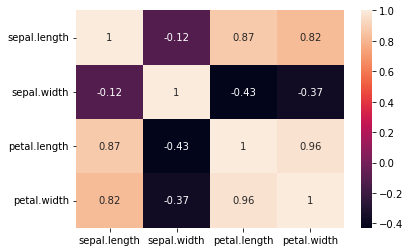

In [27]:
sns.heatmap(data.corr(), annot=True)

Step 1: Standardize the data

In [28]:
x=data.drop(columns=['variety'])
y=data['variety']

In [29]:
x.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
x_s = StandardScaler().fit_transform(x)

In [32]:
x_s[:,0].mean()

-4.736951571734001e-16

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca=PCA(n_components=3)

In [35]:
pca_data = pca.fit_transform(x_s)

In [36]:
pca_data

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ],
       [-2.07563095,  1.48917752,  0.02696829],
       [-2.44402884,  0.0476442 ,  0.3354704 ],
       [-2.23284716,  0.22314807, -0.0886955 ],
       [-2.33464048, -1.11532768,  0.14507686],
       [-2.18432817, -0.46901356, -0.25376557],
       [-2.1663101 ,  1.04369065, -0.2686811 ],
       [-2.32613087,  0.13307834,  0.09375924],
       [-2.2184509 , -0.72867617, -0.23091124],
       [-2.6331007 , -0.96150673,  0.18079608],
       [-2.1987406 ,  1.86005711, -0.472901  ],
       [-2.26221453,  2.68628449,  0.03052661],
       [-2.2075877 ,  1.48360936, -0.00534409],
       [-2.19034951,  0.48883832, -0.04421532],
       [-1.898572  ,  1.40501879, -0.37434327],
       [-2.34336905,  1.12784938,  0.13263047],
       [-1.914323  ,  0.40885571, -0.421

In [37]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

## Scree plot

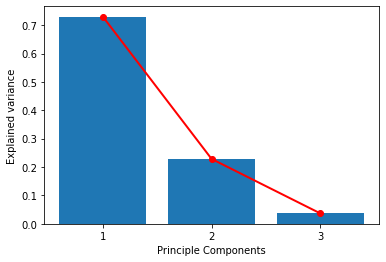

In [38]:
var = pca.explained_variance_ratio_
pc_val=np.arange(pca.n_components)+1
plt.plot(pc_val, var, 'o-',linewidth=2, color='r')
plt.bar(pc_val,var)
plt.xticks([1,2,3])
plt.xlabel('Principle Components')
plt.ylabel('Explained variance')
plt.show()

In [39]:
var[0]+var[1]

0.9581320720000164

In [40]:
pca = PCA(n_components=2)

In [41]:
new_x = pca.fit_transform(x_s)

In [42]:
red_data= pd.DataFrame({'PC1':new_x[:,0],'PC2':new_x[:,1],'variety':y})

In [43]:
red_data

,PC1,PC2,variety
0,-2.264703,0.480027,Setosa
1,-2.080961,-0.674134,Setosa
2,-2.364229,-0.341908,Setosa
3,-2.299384,-0.597395,Setosa
4,-2.389842,0.646835,Setosa
...,...,...,...
145,1.870503,0.386966,Virginica
146,1.564580,-0.896687,Virginica
147,1.521170,0.269069,Virginica
148,1.372788,1.011254,Virginica


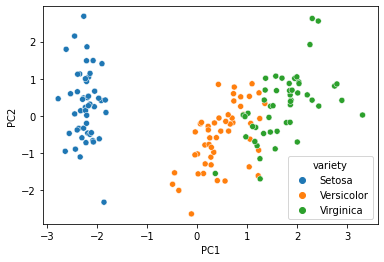

In [44]:
sns.scatterplot(x='PC1', y='PC2', hue='variety', data=red_data)
plt.show()